# Preprocessing Data

## Dealing with Categorical Features
Sklearn may not accept categorical features because they are not numerical data

Encode those categorical features into Dummy Variables
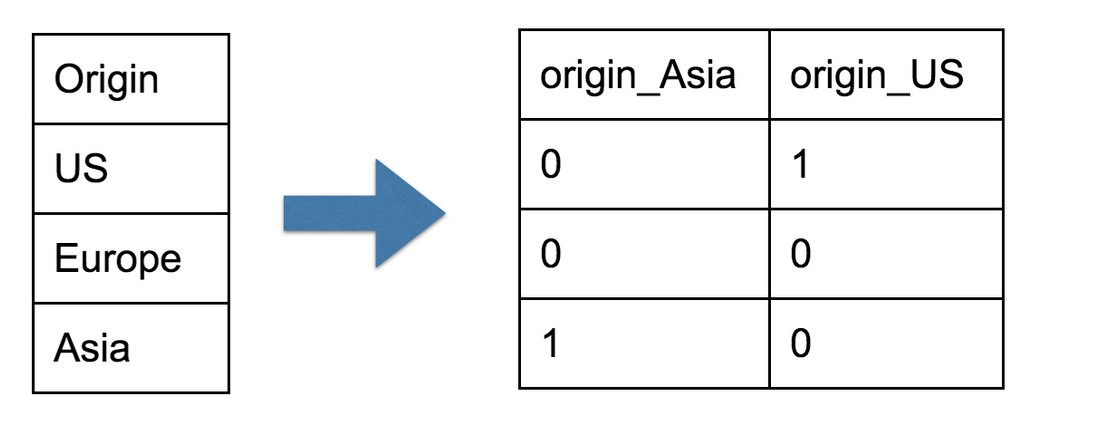

Two Ways to cope with categorical variables:
1. Scikit-learn: OneHotEncoder()
2. Pandas: get_dummies()

***

## Handling Missing Values

Use imputer object to fit and transform our dataset

In [4]:
from sklearn.impute import SimpleImputer
# strategy = ‘most_frequent’ 代表用最常出現的值取代NaN
# strategy = ‘mean’ 代表用平均值取代NaN
# axis = 0代表我們沿著column來做impute
# 若要沿著row來impute，則axis = 1
imp = SimpleImputer(missing_values = 'NaN', strategy = 'mean')

# Make changes to missing values
imp.fit(X)    # Where X is the dataset
# Transforming the data
X = imp.transform(X)

NameError: name 'X' is not defined

After transforming, we can start fitting our data into a model.

## Combine fitting and transforming steps into one step

Using the sklearn pipeline object to do so

### Data Preparation Stage

In [14]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# Use logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define the imputer object
imp = SimpleImputer(missing_values = 'NaN', strategy = 'mean')

# Initiate a logistic regression model
logreg = LogisticRegression()

# Build a pipeline object using a list
steps = [("imputation", imp), ("Logistic Regression", logreg)]

# Pass the pipeline object to the pipeline constructor
pipeline = Pipeline(steps)

# Split our data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

NameError: name 'X' is not defined

### Modelling Stage

In [6]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# compute accuracy
pipeline.score(X_test, y_test)

NameError: name 'pipeline' is not defined

### 重點

Pipeline的steps有個限制：
最後一步(最後一個tuple)必須要是**建模步驟**(regressor or classifier)，前面其他步驟都要是**Transformer**。

***

## Standardising Data

1. Scaling and Centring: Subtract the mean and divide by variance --> centred around 0 and have variance 1
2. Subtract the minimum and divide by the range --> minimum is around 0 and maximum is around 1

In [25]:
import pandas as pd
df = pd.read_csv("winequality-red.csv", delimiter = ";")

print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [27]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [33]:
from sklearn.preprocessing import scale
Test = df["total sulfur dioxide"].to_numpy()

Test_scaled = scale(Test)

Original feature "total sulfur dioxide"

In [38]:
print("Mean = "+str(np.mean(Test)))
print("Standard Deviation = "+str(np.std(Test)))

Mean = 46.46779237023139
Standard Deviation = 32.88503665178374


Scaled feature "total sulfur dioxide"

In [39]:
print("Mean = "+str(np.mean(Test_scaled)))
print("Standard Deviation = "+str(np.std(Test_scaled)))

Mean = 4.443669391870545e-17
Standard Deviation = 0.9999999999999999


Scaling step 也可以用pipeline來整合

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Set up the steps
steps = [
    ("Standardisation", StandardScaler()),
    ("KNN", KNeighborsClassifier())
]

# Initiate a pipeline object
pipeline = Pipeline(steps)

Splitting data

In [48]:
X = df.drop("quality", axis = 1).to_numpy()
y = df["quality"].to_numpy()


# Split our data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=21)

Fitting data into the pipeline

In [54]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
pipeline.score(X_test, y_test)

0.615625

---

## Cross Validation and Scaling in Pipeline

### 重點：如果cv配上pipeline，則param_grid中Key的名稱必須等於steps的最後一步的名稱+ '__' +特定參數名稱

在這裡，steps的最後一步為**Knn** <br/>
knn的CV參數為**n_neighbors** <br/>
因此param_grid內的Key要改成**Knn__n_neighbors**

In [65]:
# Set up the pipeline object
steps = [
    ('scaler', StandardScaler()),
    ('Knn', KNeighborsClassifier())
]
pipeline = Pipeline(steps)

# tune k value
param_grid = {'Knn__n_neighbors': np.arange(1, 50)}

# Split our data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=21)

# Performing CV with pipeline object
from sklearn.model_selection import GridSearchCV
scaled_knn_cv = GridSearchCV(pipeline, param_grid, cv = 5)

# Fit our model
scaled_knn_cv.fit(X_train, y_train)

# Make prediction
y_pred = scaled_knn_cv.predict(X_test)

0.634375

In [67]:
# Print best value of k
print(scaled_knn_cv.best_params_)

# Prediction Accuracy
scaled_knn_cv.score(X_test, y_test)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

{'Knn__n_neighbors': 1}
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.18      0.12      0.15        16
           5       0.66      0.72      0.69       127
           6       0.68      0.60      0.64       131
           7       0.63      0.69      0.66        42
           8       0.25      0.33      0.29         3

    accuracy                           0.63       320
   macro avg       0.40      0.41      0.40       320
weighted avg       0.63      0.63      0.63       320



---

# Example: Combine imputation, scaling and cross-validation

In [ ]:
# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters, cv = 3)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))